# Heart Disease Classifier

In this notebook, we explore different machine learning libraries in Python with the goal of constructing a predictive model for determining the presence of heart disease in individuals. We aim to leverage various medical attributes to make accurate predictions about whether a person has heart disease or not.

We're  going to take the following approach : 
 1. Problem Definiton
 2. Data
 3. Evaluation
 4. Features
 5. Modelling
 6. Experimentation
 
 
 
## 1. Problem Definition 

### Context 
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Aim 
The objective of this project is to develop a machine learning model that can accurately predict the presence or absence of heart disease based on various clinical parameters provided about a patient. This prediction is crucial for early detection and management of cardiovascular diseases, which are the leading cause of global mortality, responsible for millions of deaths each year. By leveraging the power of machine learning, we aim to provide a tool that can assist in identifying individuals at high cardiovascular risk, allowing for timely intervention and improved patient outcomes.

So basically in a statement, 
> Given clinical parameters about a patient, can we predict whetther the person is having a heart disease or not?



## 2. Data

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

There is also a version of it availble on Kaggle : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?datasetId=1582403&sortBy=voteCount


## 3. Evaluation 

Considering the significant investment of time in developing a heart disease classifier model, our objective is to attain a high level of accuracy, specifically targeting a threshold of 95%. This means that we aim to build a model that can effectively predict whether an individual has heart disease or not, with an accuracy rate of 95% or higher. Achieving this level of accuracy would provide strong confidence in the model's ability to make accurate predictions and would be a substantial accomplishment in the field of heart disease classification. Such a high level of accuracy would greatly enhance the model's practical utility in assisting healthcare professionals with early detection and management of cardiovascular diseases.

In simple statement,
> If we can reach 95% accuracy at predicting wheteher or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

Within this section, you will find a detailed explanation of the different attributes used in the Heart Classifier model. It serves as a comprehensive dictionary providing information about each attribute's meaning and significance in relation to the task of classifying heart disease. By referring to this section, users can gain a clear understanding of the purpose and relevance of each attribute in the model. This knowledge will enable better interpretation and analysis of the classifier's predictions, enhancing the overall comprehension of the model's functioning and results.


1. Age: age of the patient (in years)
2. Sex: sex of the patient (M: Male, F: Female)
3. ChestPainType: chest pain type 
    * TA: Typical Angina
    * ATA: Atypical Angina
    * NAP: Non-Anginal Pain
    * ASY: Asymptomatic
4. RestingBP: resting blood pressure (in mm Hg)
5. Cholesterol: serum cholesterol (in mm/dl)
6. FastingBS: fasting blood sugar 
    * 1: if FastingBS > 120 mg/dl
    * 0: otherwise
7. RestingECG: resting electrocardiogram results 
    * Normal: Normal
    * ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
9. ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
10. Oldpeak: Numeric value measured in depression(oldpeak = ST)
11. ST_Slope: the slope of the peak exercise ST segment 
    * Up: upsloping 
    * Flat: flat 
    * Down: downsloping
12. HeartDisease: output class (1: heart disease, 0: Normal)

## Preparing the tools 

For conducting data analysis and manipulation, we will utilize popular Python libraries such as pandas, Matplotlib, and NumPy. These libraries offer powerful tools and functionalities that enable efficient handling, exploration, and visualization of data. By leveraging pandas, we can effectively work with structured data, perform data cleaning, and conduct various operations such as filtering, grouping, and aggregation. Matplotlib provides robust plotting capabilities, allowing us to create informative visualizations to gain insights from the data. Additionally, NumPy provides essential mathematical and numerical operations, enabling efficient computation and manipulation of arrays and matrices. Overall, these libraries form a solid foundation for conducting comprehensive data analysis and manipulation in our project.

* NumPy
* Pandas
* MAtplotlib




In [46]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Data Preprocessesing tools
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

## Load Data

In [3]:
data = pd.read_csv("./data/heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.shape

(918, 12)

## Data Exploration (exploratory data analysis)

The goal here is to find out more about the data and become a subjwct matter expert on the dataset you're working with

1. What questions are you tryin to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing in the data and how should you desl with it?
4. Where sre the outliers and why should you care about them?
5. How csn you add, change, or remover features to get more out of your data?

In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

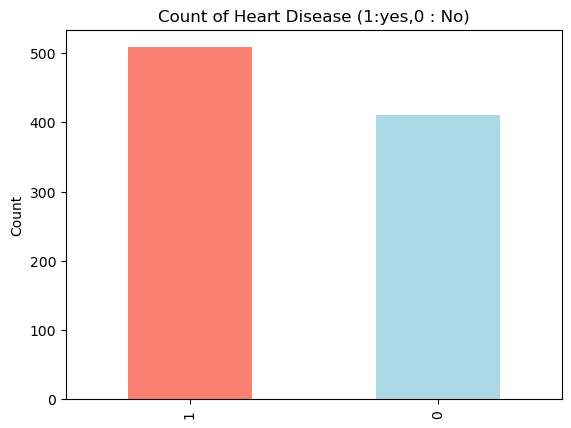

In [8]:
data["HeartDisease"].value_counts().plot(kind = "bar", color= ["salmon", "lightblue"]);
plt.ylabel("Count");
plt.title("Count of Heart Disease (1:yes,0 : No)");

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
# Are there any missing value😱
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Heart Disease Frequency according to Sex

In [12]:
data.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(data.HeartDisease,data.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


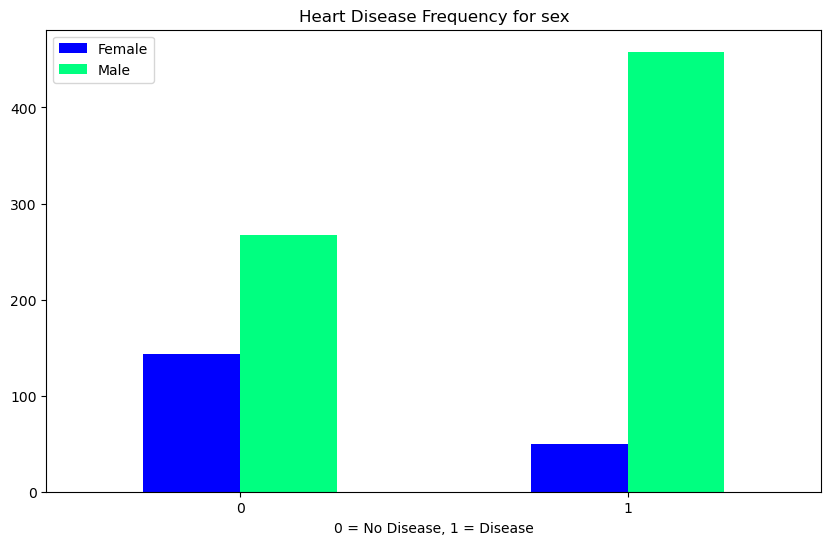

In [14]:
# Compare target column with sex column
pd.crosstab(data.HeartDisease,data.Sex).plot(kind= "bar",cmap = "winter",figsize = (10,6));
plt.title("Heart Disease Frequency for sex");
plt.xlabel("0 = No Disease, 1 = Disease");
plt.legend(["Female","Male"]);
plt.xticks(rotation = 0);

#### Comparing Age, Maximum Heart Rate and HeartDisease

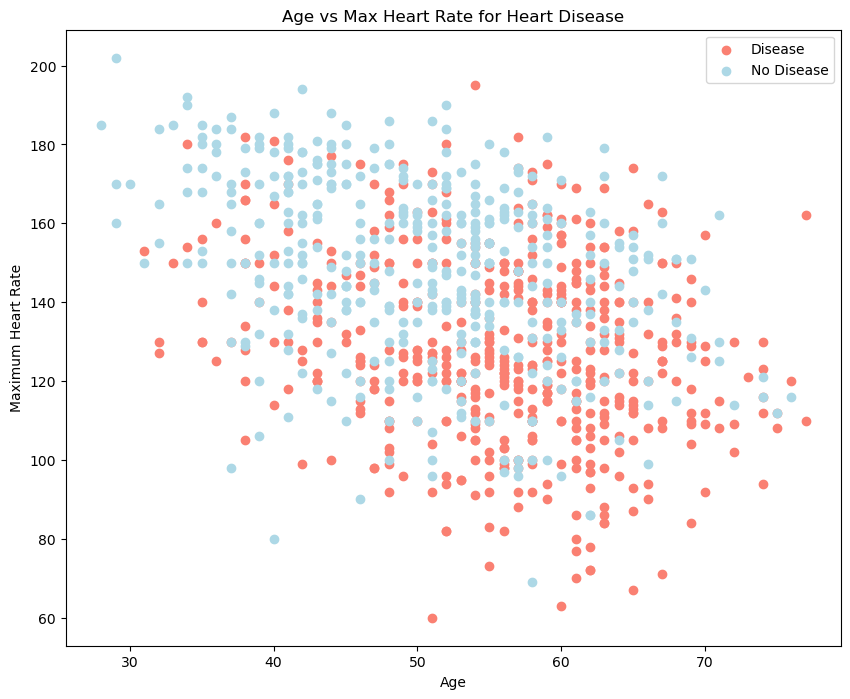

In [15]:
# Create another figure
fig , ax = plt.subplots(figsize = (10,8))

# Scatter with positive examples
ax.scatter(data["Age"][data["HeartDisease"]==1],data["MaxHR"][data["HeartDisease"]==1],color = "salmon")

#Scatter with negative examples
ax.scatter(data["Age"][data["HeartDisease"]==0],data["MaxHR"][data["HeartDisease"]==0],color = "lightblue")

ax.set(xlabel = "Age",
       ylabel = "Maximum Heart Rate",
       title = "Age vs Max Heart Rate for Heart Disease")
plt.legend(["Disease","No Disease"]);

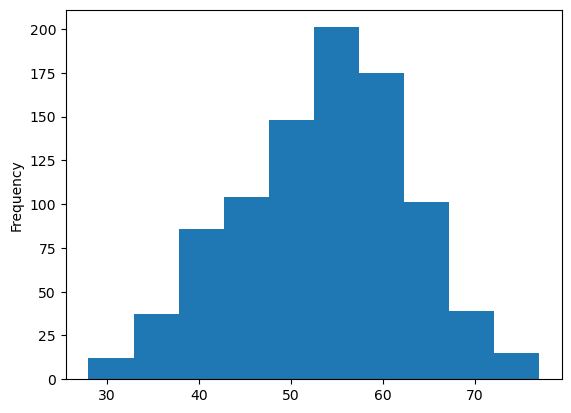

In [16]:
# Now lets check the spread of age
data.Age.plot.hist();

#### Comparing Chest Pain  and Heart Disease frewuency

ChestPainType: chest pain type 
   * TA: Typical Angina
   * ATA: Atypical Angina
   * NAP: Non-Anginal Pain
   * ASY: Asymptomatic

In [17]:
pd.crosstab(data.ChestPainType,data.HeartDisease)

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


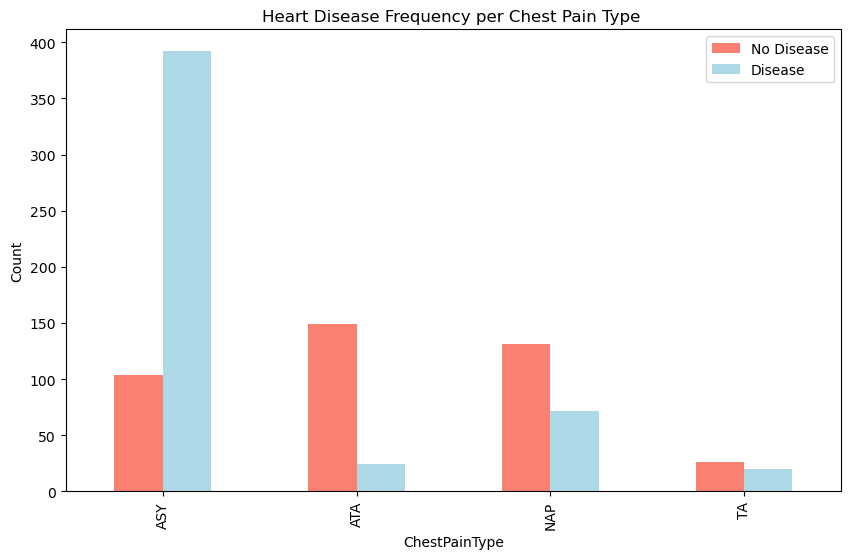

In [18]:
# Make the cross tab more visual 
pd.crosstab(data.ChestPainType,data.HeartDisease).plot(kind = "bar", figsize = (10,6), color = ["salmon","lightblue"]);
plt.title("Heart Disease Frequency per Chest Pain Type ")
plt.ylabel("Count");
plt.legend(["No Disease","Disease"]);

#### Correlation Matrix

In [19]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


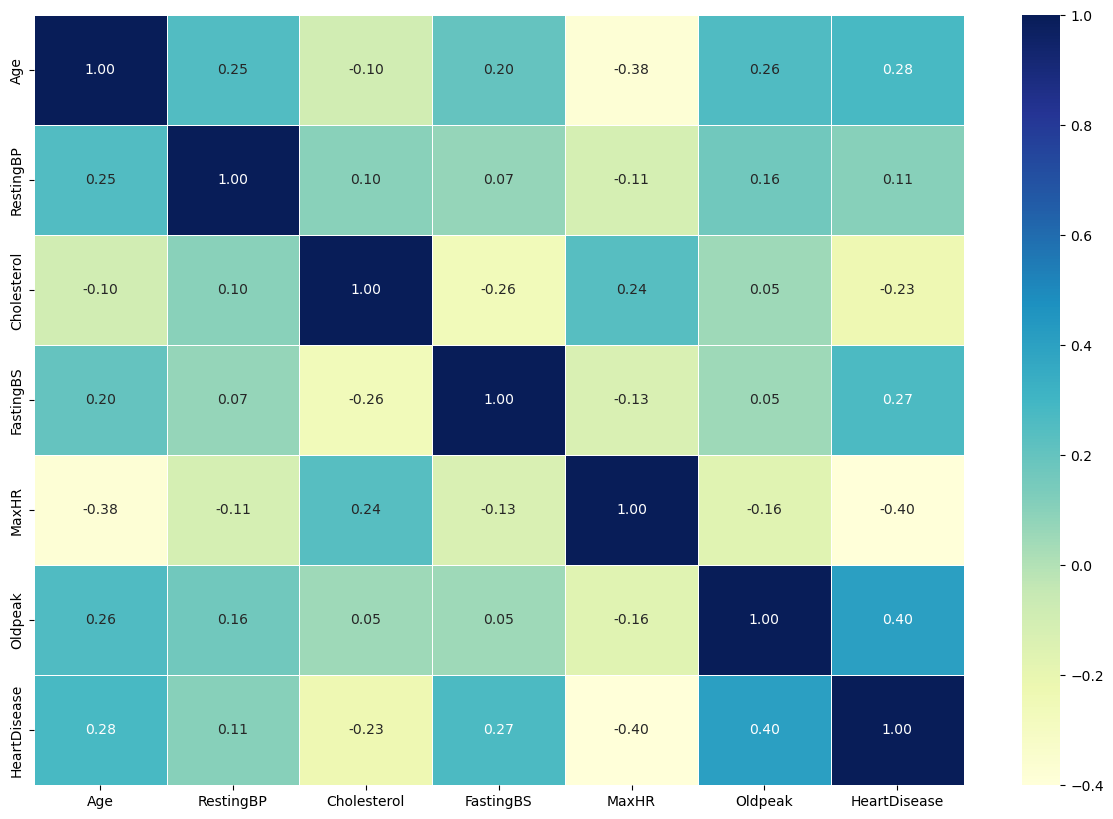

In [20]:
# Lets make our correlation matrix a little prettier 
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt = '.2f',
                cmap = 'YlGnBu')

#### Comparing Maximum Heart Rate with Heartdisease

In [21]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [22]:
pd.crosstab(data['HeartDisease'],data['ExerciseAngina'])

ExerciseAngina,N,Y
HeartDisease,,
0,355,55
1,192,316


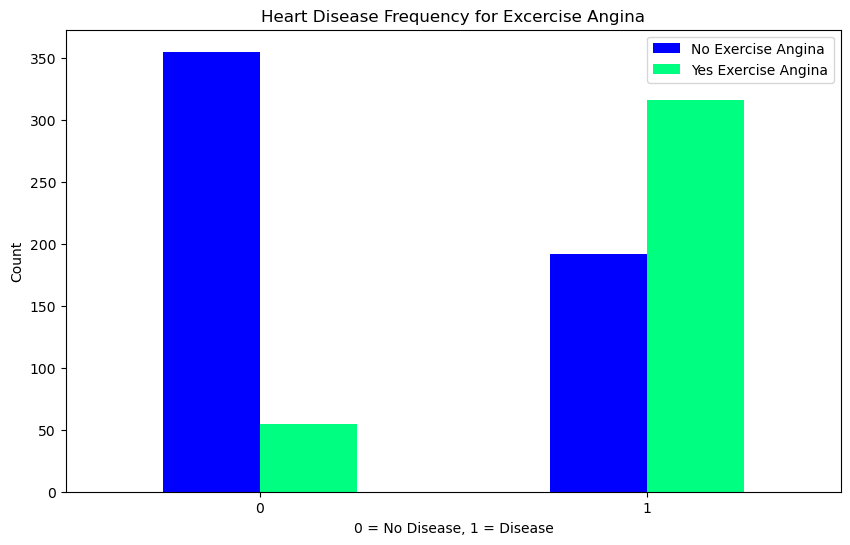

In [23]:
pd.crosstab(data.HeartDisease,data.ExerciseAngina).plot(kind= "bar",cmap = "winter",figsize = (10,6));
plt.title("Heart Disease Frequency for Excercise Angina");
plt.xlabel("0 = No Disease, 1 = Disease");
plt.legend(["No Exercise Angina","Yes Exercise Angina"]);
plt.ylabel("Count")
plt.xticks(rotation = 0);

In [24]:
pd.crosstab(data["HeartDisease"],data['ST_Slope'])

ST_Slope,Down,Flat,Up
HeartDisease,,,
0,14,79,317
1,49,381,78


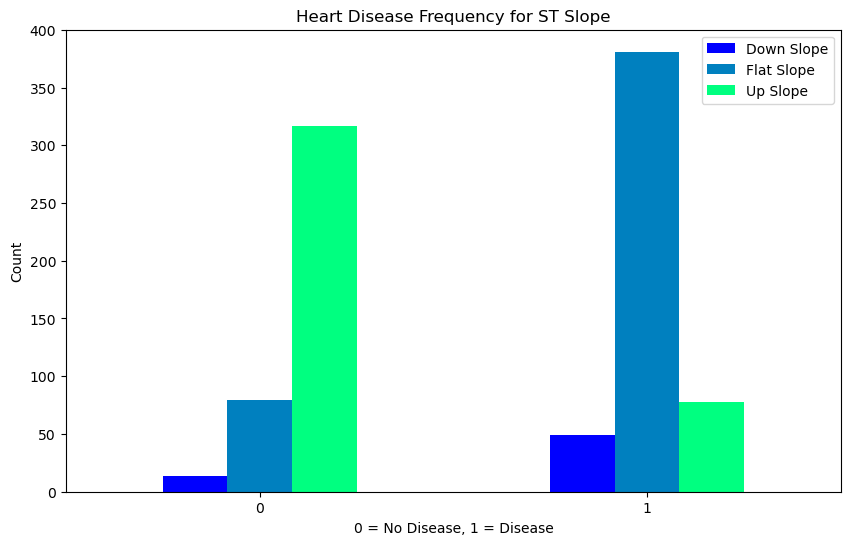

In [25]:
pd.crosstab(data.HeartDisease,data.ST_Slope).plot(kind= "bar",cmap = "winter",figsize = (10,6));
plt.title("Heart Disease Frequency for ST Slope");
plt.xlabel("0 = No Disease, 1 = Disease");
plt.legend(["Down Slope","Flat Slope","Up Slope"]);
plt.ylabel("Count")
plt.xticks(rotation = 0);

In [26]:
pd.crosstab(data.HeartDisease,data.RestingECG)

RestingECG,LVH,Normal,ST
HeartDisease,,,
0,82,267,61
1,106,285,117


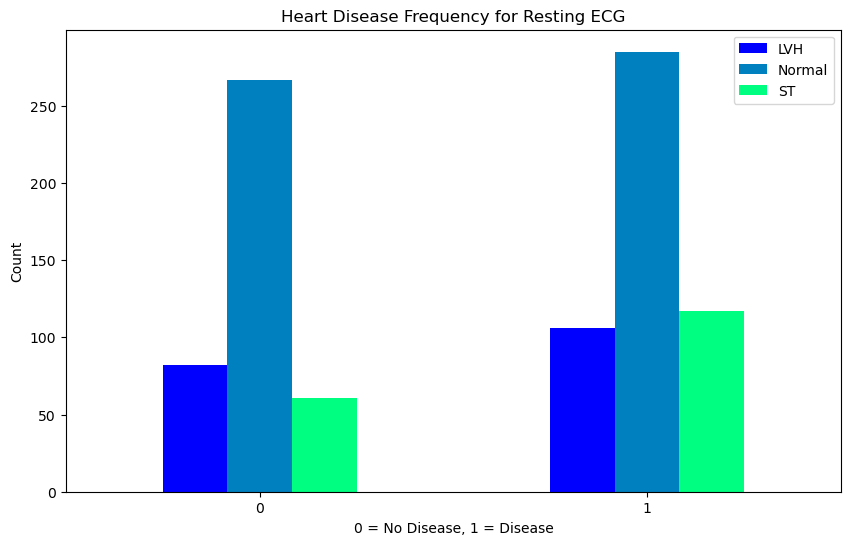

In [27]:
pd.crosstab(data.HeartDisease,data.RestingECG).plot(kind= "bar",cmap = "winter",figsize = (10,6));
plt.title("Heart Disease Frequency for Resting ECG");
plt.xlabel("0 = No Disease, 1 = Disease");
plt.legend(["LVH","Normal","ST"]);
plt.ylabel("Count")
plt.xticks(rotation = 0);

## Data Preprocessing

In order to utilize the Scikit-learn library effectively, we need to convert the string columns in our dataset to either nominal or ordinal categorical features. This preprocessing step is necessary to ensure compatibility with the Scikit-learn library, which primarily operates on numerical data. By converting the string columns to categorical features, we can represent the data in a format that Scikit-learn can process and apply various machine learning algorithms. This conversion process enables us to take advantage of the wide range of powerful tools and techniques offered by the Scikit-learn library for building our heart disease classifier model.


In [28]:
data_tree = data.apply(LabelEncoder().fit_transform)
data_tree

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


Due to the presence of columns with a wide range of values in the dataset, it is necessary to perform data scaling to effectively utilize models such as SVM Classifier, K-Nearest Neighbors (KNN), and Logistic Regression. Scaling the data is crucial in these cases to ensure that all features contribute equally to the model's training process. Scaling helps prevent features with larger value ranges from dominating the model's optimization or distance calculations.

By applying feature scaling techniques, such as standardization (Z-score normalization) or normalization (min-max scaling), we can transform the data to a comparable scale. This process ensures that each feature is uniformly represented and contributes appropriately to the decision boundaries or distance calculations performed by these models. Feature scaling enables better convergence during the training process and improves the overall performance and accuracy of the SVM Classifier, KNN, and Logistic Regression models when dealing with data spread across a wide range of values.

In [29]:
# Lets split the data into X and y
np.random.seed(42)
X = data_tree.drop("HeartDisease", axis = 1)
y = data_tree["HeartDisease"]
# Splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_Scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_Scaled = pd.DataFrame(scaler.fit_transform(X),columns=X_test.columns)

In [31]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X_train_minmaxScaled = pd.DataFrame(minmaxscaler.fit_transform(X_train),columns=X_train.columns)
X_test_minmaxScaled = pd.DataFrame(minmaxscaler.fit_transform(X_test),columns=X_test.columns)
X_minmaxScaled = pd.DataFrame(minmaxscaler.fit_transform(X),columns=X_test.columns)

# 5. Modelling


In [32]:
data_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


With our data successfully split into training and test sets, we can proceed to build our machine learning model. First, we will train the model using the training set, aiming to identify patterns and relationships within the data. This training process involves feeding the model with the training data and allowing it to learn from the provided examples.

Once the model is trained, we will move on to the testing phase. During this stage, we will use the trained model to make predictions on the test set. By applying the patterns learned during training, the model will make predictions based on the input features from the test set. This allows us to assess the model's performance and evaluate its ability to generalize and accurately predict outcomes on unseen data.

By following this approach of training and testing, we can iteratively refine and improve our machine learning model, ensuring its effectiveness in predicting heart disease based on the given dataset .

We will use the following models : 
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Support Vector Machine
4. Random Forest Classifier
5. Navier Bayers

In [33]:
# Creating a dictionary for all models
models = {"Logistic Regression": LogisticRegression(max_iter=100),
         "KNN": KNeighborsClassifier(),
         "SVC": SVC(),
         "Navie Bayers": GaussianNB(),
         "Random Forest Classifier":RandomForestClassifier()}

# Create Evaluation Metrics score checker
def evaluation_metrics(y_test,y_preds):
    """
    Evaluates the different metrics score of a model
    """
    prec = precision_score(y_test,y_preds)
    report = classification_report(y_test, y_preds,output_dict = True)
    f1 = f1_score(y_test,y_preds)
    rec = recall_score(y_test,y_preds)
    roc = roc_auc_score(y_test,y_preds)
    acc = accuracy_score(y_test,y_preds)
    return {
        "Accuracy_Score":acc,
        "Precision_Score": prec,
        "Recall_Score": rec,
        "f1_Score": f1,
        "ROC_Score": roc,
    }

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and eva;uates given machine learning models.
    models : a dict of different Scikit-Learn Machine Learning model
    X_train : training data
    X_test : testing data
    y_train : training labels
    y_test : testing labels
    """
    # Set the random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_score = {}
    # Looping through models
    for name,model in models.items():
        # Fitting the model
        model.fit(X_train,y_train)
        # Making prediction
        y_preds = model.predict(X_test)
        # Evaluating the model and appending it to the dictionary
        model_score[name] = evaluation_metrics(y_test,y_preds)
    return model_score

In [34]:
score_dict = fit_and_score(models,X_train,X_test,y_train,y_test)
score_dict

{'Logistic Regression': {'Accuracy_Score': 0.8315217391304348,
  'Precision_Score': 0.9042553191489362,
  'Recall_Score': 0.794392523364486,
  'f1_Score': 0.845771144278607,
  'ROC_Score': 0.8387547032406846},
 'KNN': {'Accuracy_Score': 0.7228260869565217,
  'Precision_Score': 0.78,
  'Recall_Score': 0.7289719626168224,
  'f1_Score': 0.7536231884057971,
  'ROC_Score': 0.7216288384512684},
 'SVC': {'Accuracy_Score': 0.7065217391304348,
  'Precision_Score': 0.7623762376237624,
  'Recall_Score': 0.719626168224299,
  'f1_Score': 0.7403846153846154,
  'ROC_Score': 0.7039689282679937},
 'Navie Bayers': {'Accuracy_Score': 0.8097826086956522,
  'Precision_Score': 0.8829787234042553,
  'Recall_Score': 0.7757009345794392,
  'f1_Score': 0.8258706467661693,
  'ROC_Score': 0.8164218958611482},
 'Random Forest Classifier': {'Accuracy_Score': 0.875,
  'Precision_Score': 0.8888888888888888,
  'Recall_Score': 0.897196261682243,
  'f1_Score': 0.8930232558139535,
  'ROC_Score': 0.8706760529190436}}

### Model Comparison

<Figure size 1000x800 with 0 Axes>

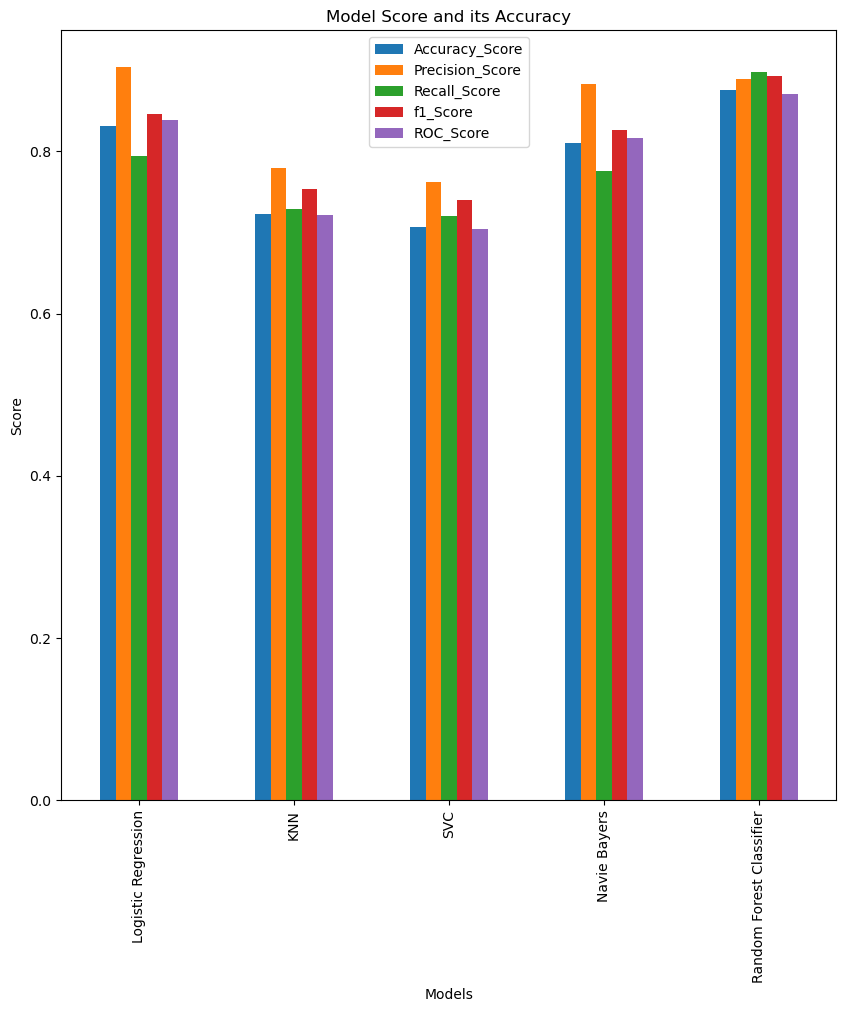

In [35]:
model_compare = pd.DataFrame(score_dict)
plt.figure(figsize=(10,8));
model_compare.T.plot(kind="bar",figsize = (10,10));
plt.xlabel("Models");
plt.ylabel("Score");
plt.title("Model Score and its Accuracy");

Now we've got a baseline model... and we know a model's first predictions arent always what we shou based on our nexr stps ff. What should do?

Let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Cross Validation
* Confusion Matrix 
* Cross-Validation
* ROC Curve
* Area Under the curve

## KNN Model Tuning

In [36]:
# Let's tune KNN model by changing n_neighbors parameter
train_score = []
test_score = []

# Creating a list of neigbors 
neigbors = range(1,21)

# Instantiating the model
knn = KNeighborsClassifier()

# Looping through the different n_neigbhors
for i in neigbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    # Updating the Train Score Dictionary
    train_score.append(knn.score(X_train,y_train))
    # Updating the Test Score Dictionary
    test_score.append(knn.score(X_test,y_test))

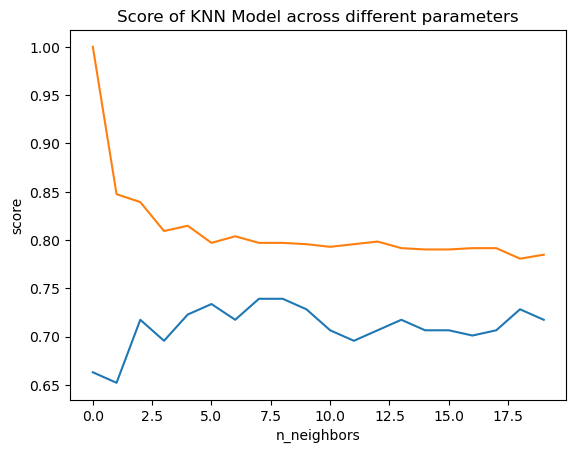

<Figure size 1000x800 with 0 Axes>

In [37]:
plt.plot(test_score)
plt.plot(train_score)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score of KNN Model across different parameters")
plt.figure(figsize=(10,8));

In [38]:
print(f"The maximum accuracy score is {max(test_score) * 100:.2f}%")

The maximum accuracy score is 73.91%


In [39]:
# Let's tune KNN model by changing n_neighbors parameter
train_score_scaled = []
test_score_scaled = []

# Creating a list of neigbors 
neigbors = range(1,21)

# Instantiating the model
knn_Scaled = KNeighborsClassifier()

# Looping through the different n_neigbhors
for i in neigbors:
    knn_Scaled.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn_Scaled.fit(X_train_Scaled,y_train)
    # Updating the Train Score Dictionary
    test_score_scaled.append(knn_Scaled.score(X_test_Scaled,y_test))
    # Updating the Test Score Dictionary
    train_score_scaled.append(knn_Scaled.score(X_train_Scaled,y_train))


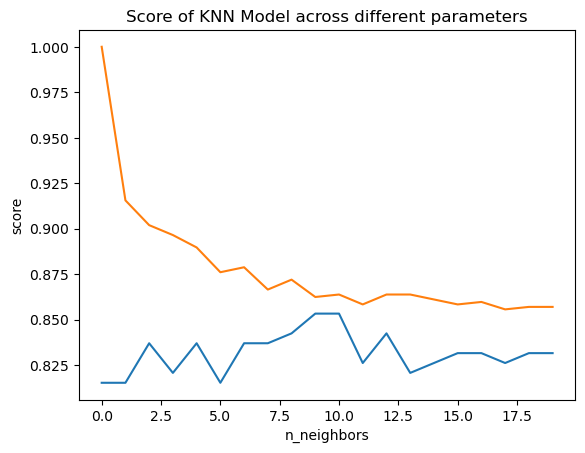

<Figure size 1000x800 with 0 Axes>

In [40]:
plt.plot(test_score_scaled)
plt.plot(train_score_scaled)
# Customizing the plot
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score of KNN Model across different parameters")
plt.figure(figsize=(10,8));

In [41]:
print(f"The maximum accuracy score is {max(test_score_scaled)* 100:.2f}%")

The maximum accuracy score is 85.33%


In [42]:
# Let's tune KNN model by changing n_neighbors parameter
train_score_minmax = []
test_score_minmax = []

# Creating a list of neigbors 
neigbors = range(1,21)

# Instantiating the model
knn_minmaxScaled = KNeighborsClassifier()

# Looping through the different n_neigbhors
for i in neigbors:
    knn_minmaxScaled.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn_minmaxScaled.fit(X_train_minmaxScaled,y_train)
    # Updating the Train Score Dictionary
    test_score_minmax.append(knn_minmaxScaled.score(X_test_minmaxScaled,y_test))
    # Updating the Test Score Dictionary
    train_score_minmax.append(knn_minmaxScaled.score(X_train_minmaxScaled,y_train))


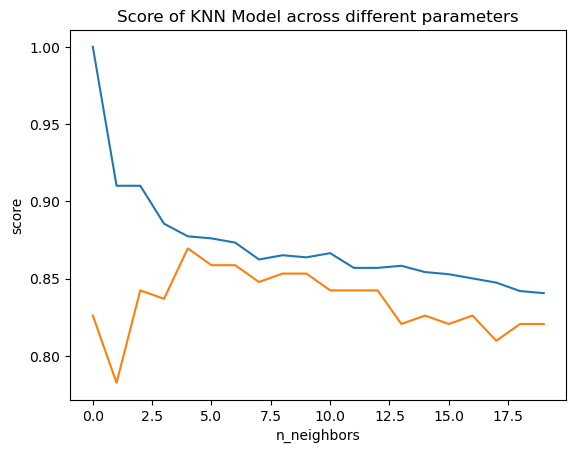

<Figure size 1000x800 with 0 Axes>

In [43]:
plt.plot(train_score_minmax)
plt.plot(test_score_minmax)
# Customising the plot
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score of KNN Model across different parameters")
plt.figure(figsize=(10,8));

In [44]:
print(f"The maximum accuracy score is {max(test_score_minmax)* 100:.2f}%")

The maximum accuracy score is 86.96%


So from the dataframe we can conclude that if n_neighbors = 10 then we will get the maximum evaluation score for the KNN Model

We can see that just by scaling the data we improve out model accuracy for KNN model from `73.91%` to `85.33%`, so its important to scale our data

Since there is not a lot difference in MinMax Scaled scale score and Standard Scaled Score, we will now compute the Cross Validation Score for our model

Now lets tune over model by using `GridSearchCV()` 

In [54]:
grid_param_KNN = {
    "n_neighbors" : [None,5,7,10,11],
    "weights": ['uniform', 'distance'],
    'metric' : ['minkowski','euclidean','manhattan']
} 
gs = GridSearchCV(KNeighborsClassifier(),grid_param_KNN,verbose=2,cv = 5);

gs_KNN_Scaled = gs.fit(X_train_Scaled,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=

In [50]:
gs_KNN_Scaled.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [51]:
# Now Evauating the hypertuned model
gs_KNN_Scaled.score(X_test_Scaled, y_test)

0.8695652173913043

In [53]:
gs = GridSearchCV(KNeighborsClassifier(),grid_param_KNN,verbose=2,cv = 5)

gs_KNN_minmaxScaled = gs.fit(X_train_minmaxScaled,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=None, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=

In [55]:
gs_KNN_minmaxScaled.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [56]:
gs_KNN_minmaxScaled.score(X_test_minmaxScaled,y_test)

0.8913043478260869


Based on the graph analysis, we can draw the conclusion that the K-Nearest Neighbors (KNN) model, which was min-max scaled, achieved the highest accuracy compared to other KNN models.

By examining the graph, it becomes evident that the min-max scaling approach resulted in the best performance in terms of accuracy. This finding suggests that scaling the data using the min-max scaling technique effectively improved the KNN model's ability to make accurate predictions.

The comparison of accuracy across different scaling techniques highlights the importance of data preprocessing in enhancing the performance of machine learning models. In this case, min-max scaling demonstrated its effectiveness in ensuring that all features were on a comparable scale, leading to improved accuracy.

Hence, based on the graph analysis, we can conclude that the KNN model with min-max scaling outperformed other models in terms of accuracy, making it the preferred choice for this specific classification task.

## Random Forest Classifier Hyperparameter Tuning

Now we're going to tune our `RandomForestClassifier()` model

Let's do this using the `RandomiszedSearchCV`

In [57]:
# Create Random Grid Parameters Dictionar
random_grind_rfc = {'bootstrap': [True, False],
 'max_depth': np.arange(30,180,10),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': np.arange(2,20,2),
 'min_samples_split': np.arange(2,20,2),
 'n_estimators': np.arange(400,2800,200)}

# Set Random Seed
np.random.seed(42)

# Setup rand hyperparameter search for RandomForestClassifier
rs = RandomizedSearchCV(RandomForestClassifier(),
                        random_grind_rfc,
                        verbose = 2,
                        n_iter = 40,
                        cv = 3,
                        )

# Fir the random hyperparameter search Model for RandomForestClassifier()
rs_rfc = rs.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END bootstrap=False, max_depth=170, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=2400; total time=   1.6s
[CV] END bootstrap=False, max_depth=170, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=2400; total time=   1.4s
[CV] END bootstrap=False, max_depth=170, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=2400; total time=   1.3s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=16, min_samples_split=18, n_esti

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=4, n_estimators=1800; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=4, n_estimators=1800; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=4, n_estimators=1800; total time=   1.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=18, min_samples_split=4, n_estimators=1800; total time=   0.9s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=18, min_samples_split=4, n_estimators=1800; total time=   0.8s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=18, min_samples_split=4, n_estimators=1800; total time=   0.9s
[CV] END bootstrap=False, max_

[CV] END bootstrap=False, max_depth=150, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=800; total time=   0.4s


In [58]:
rs_rfc.best_params_

{'n_estimators': 400,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 120,
 'bootstrap': True}

In [59]:
rs_rfc.score(X_test,y_test)

0.9021739130434783

Now let's do the same using `GridSearchCV`

In [61]:
# Create Grid Parameters Dictionary
Grid_grind_rfc = {'bootstrap': [True, False],
 'max_depth': [ 30, 40, 90, 80],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [ 1, 8],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [ 2200, 1600]}

# Setup the rando seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
gs = GridSearchCV(RandomForestClassifier(),
                  Grid_grind_rfc,
                  verbose = 2,
                  cv = 3,
)

# Fit the hyperparameter seacrh model for RandomForestClassifier
gs_rfc = gs.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=220

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, m

[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=

[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, ma

[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, m

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=2200; total time=   1.1s
[CV] END bootstrap=False, ma

[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_dept

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.1s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.8s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.8s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=2200; total time=   1.1s
[CV] END bootstrap=False, max_dep

[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   1.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2200; total time=   1.2s
[CV] END bootstrap=False, ma

[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.1s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   1.0s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   0.9s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2200; total time=   1.3s
[CV] END bootstrap=False, max_dept

In [62]:
gs_rfc.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [63]:
gs_rfc.score(X_test,y_test)

0.8913043478260869

## Logistic Regression Hyperparameter Tuning

In [64]:
# Creating Random Hyperparameters Dictionary
random_grid_reg = {
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C' : np.logspace(-4,4,30)
}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression 
rs = RandomizedSearchCV(LogisticRegression(),
                           random_grid_reg,
                           n_iter=40,
                           verbose=2,
                           cv = 5)

# Fit the hyperparameter seacrh model for LogisticRegression
rs_reg = rs.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .......C=0.7278953843983146, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.0003562247890262444, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0003562247890262444, penalty=l2,

[CV] END C=4.893900918477489, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4.893900918477489, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=1.3738237958832638, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=1.3738237958832638, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=1.3738237958832638, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=1.3738237958832638, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END C=1.3738237958832638, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END .....C=0.7278953843983146, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.7278953843983146, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.7278953843983146, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.7278953843983146, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.7278953843983146, penalty=l1, solver=lbfgs; total time=   

In [65]:
rs_reg.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 2.592943797404667}

In [66]:
rs_reg.score(X_test,y_test)

0.8369565217391305

Now let's do with `GridSearchCV`

In [67]:
# Creating Random Hyperparameters Dictionary
grid_grid_reg = {
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C' : np.logspace(-4,4,30)
}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression 
gs = GridSearchCV(LogisticRegression(),
                           random_grid_reg,
                           verbose=2,
                           cv = 5)

# Fit the hyperparameter seacrh model for LogisticRegression
gs_reg = gs.fit(X_train,y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END .................C=0.0001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.0001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, s

[CV] END ...........C=0.0001, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.0001, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.0001, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .....C=0.0001, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .....C=0.0001, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .....C=0.0001, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .....C=0.0001, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .................C=0.0001, penalty=None, solver=sag; total time=   0.0s
[CV] END .................C=0.0001, penalty=None, solver=sag; total time=   0.0s
[CV] END .................C=0.0001, penalty=None, solver=sag; total time=   0.0s
[CV] END .................C=0.0001, penalty=None, solver=sag; total time=   0.0s
[CV] END .................C=0.0001, penalty=None, solver=sag; total time=   0.0s
[CV] END ................C=0

[CV] END C=0.00018873918221350977, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=0.00018873918221350977, penalty=None, solver=newton

[CV] END ...C=0.0006723357536499335, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.0006723357536499335, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.0006723357536499335, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.0006723357536499335, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=0.0006723357536499335, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006723357536499335, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006723357536499335, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006723357536499335, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0006723357536499335, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006723357536499335, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006723357536499335, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006723357536499335, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.000672335

[CV] END C=0.0012689610031679222, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.0012689610031679222, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ....C=0.0012689610031679222, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.0012689610031679222, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.0012689610031679222, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.0012689610031679222, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=0.0012689610031679222, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...C=0.0012689610031679222, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=0.0012689610031679222, penalty=l2, solver=saga; total t

[CV] END ....C=0.002395026619987486, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.002395026619987486, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.002395026619987486, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.002395026619987486, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.002395026619987486, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.002395026619987486, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.002395026619987486, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.002395026619987486, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0023950266

[CV] END C=0.004520353656360241, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.004520353656360241, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END .....C=0.004520353656360241, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.004520353656360241, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.004520353656360241, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.004520353656360241, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.004520353656360241, penalty=l2, solver=sag; total time

[CV] END C=0.008531678524172805, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.008531678524172805, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.008531678524172805, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=0.008531678524172805, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .C=0.008531678524172805, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .C=0.008531678524172805, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .C=0.008531678524172805, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .C=0.008531678524172805, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END C=0.008531678524172805, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.008531678524172805, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.008531678524172805, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.008531678524172805, penalty=None, solver=liblinear; total time=   0.0s
[CV]

[CV] END ....C=0.01610262027560939, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=0.01610262027560939, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=0.01610262027560939, penalty=None, solver=sag; total time=   0.0s
[CV] END ...C=0.01610262027560939, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=0.01610262027560939, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=0.01610262027560939, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=0.01610262027560939, penalty=None, solver=saga; total time=   0.0s
[CV] END ...C=0.01610262027560939, penalty=None, solver=saga; total time=   0.0s
[CV] END ....C=0.03039195382313198, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03039195382313198, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03039195382313198, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03039195382313198, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03039195382

[CV] END .....C=0.05736152510448681, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.05736152510448681, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.05736152510448681, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.05736152510448681, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.05736152510448681, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.05736152510448681, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.05736152510448681, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.05736152510448681, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.05736152510448681, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05736152510448681, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05736152510448681, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.05736152510448681, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.057361525104486

[CV] END .C=0.1082636733874054, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1082636733874054, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.1082636733874054, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.1082636733874054, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.1082636733874054, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.1082636733874054, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END .......C=0.1082636733874054, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.1082636733874054, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.1082636733874054, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.1082636733874054, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.1082636733874054, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.1082636733874054, penalty=l2, solver=saga; total time=   0.0s
[CV

[CV] END ......C=0.20433597178569418, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.20433597178569418, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.20433597178569418, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.20433597178569418, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.20433597178569418, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.20433597178569418, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.20433597178569418, penalty=elasticnet, solver=liblinear; total time=   0.0s


[CV] END ......C=0.38566204211634725, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.38566204211634725, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.38566204211634725, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.38566204211634725, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.38566204211634725, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.38566204211634725, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.38566204211634725, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.38566204211634725, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.38566204211634725, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.38566204211634725, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.38566204211634725, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.38566204211634725, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0

[CV] END .C=0.7278953843983146, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.7278953843983146, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.7278953843983146, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.7278953843983146, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.7278953843983146, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.7278953843983146, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.7278953843983146, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.7278953843983146, penalty=l2, solver=sag; total time=   0.0s
[CV

[CV] END .....C=1.3738237958832638, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1.3738237958832638, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.3738237958832638, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=1.3738237958

[CV] END .......C=2.592943797404667, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=2.592943797404667, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.592943797404667, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=2.592943797404667, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=2.592943797404667, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=2.592943797404667, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=2.592943797404667, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=2.592943797404667, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=2.592943797404667, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=2.592943797404667, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=2.592943797404667, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=2.592943797404667, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=2.5929437974046

[CV] END ..C=4.893900918477489, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=4.893900918477489, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=4.893900918477489, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=4.893900918477489, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.893900918477489, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4.893900918477489, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4.893900918477489, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4.893900918477489, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4.893900918477489, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ........C=4.893900918477489, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=4.893900918477489, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=4.893900918477489, penalty=l2, solver=sag; total time=   0.0s
[CV] END

[CV] END ......C=9.236708571873866, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=9.236708571873866, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=9.236708571873866, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=9.236708571873866

[CV] END ......C=17.433288221999874, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=17.433288221999874, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=17.433288221999874, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=17.433288221999874, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=17.433288221999874, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=17.433288221999874, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=17.433288221999874, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=17.433288221999874, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=17.433288221999874, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=17.433288221999874, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=17.433288221999874, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=17.433288221999874, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=17.4332882219998

[CV] END .......C=32.90344562312671, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=32.90344562312671, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=32.90344562312671, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=32.90344562312671, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=32.90344562312671, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=32.90344562312671, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=32.90344562312671, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=32.90344562312671, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=32.90344562312671, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=32.90344562312671, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=32.90344562312671, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=32.90344562312671, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=32.903445623126

[CV] END C=62.10169418915616, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=62.10169418915616, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=62.10169418915616, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=62.10169418915616, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ........C=62.10169418915616, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=62.10169418915616, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=62.10169418915616, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=62.10169418915616, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=62.10169418915616, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=62.10169418915616, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=62.10169418915616, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=62.10169418915616, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...

[CV] END .......C=117.21022975334793, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=117.21022975334793, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=117.21022975334793, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=117.21022975334793, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=117.21022975334793, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=117.21022975334793, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=117.21022975334793, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=117.21022975334793, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=117.21022975334793, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=117.21022975334793, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=117.21022975334793, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=117.21022975334793, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=117.2

[CV] END ......C=221.22162910704503, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=221.22162910704503, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=221.22162910704503, penalty=elasticnet, solver=liblinea

[CV] END ......C=417.53189365604004, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=417.53189365604004, penalty=elasticnet, solver=n

[CV] END ....C=788.0462815669904, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=788.0462815669904, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ....C=788.0462815669904, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=788.0462815669904, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=788.0462815669904

[CV] END C=1487.3521072935118, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cg; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END C=1487.3521072935118, penalty=None, solver=newton-cholesky; total

[CV] END .....C=2807.2162039411755, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=2807.2162039411755, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=2807.2162039411755, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=2807.2162039411755, penalty=None, solver=sag; total time=   0.0s
[CV] END .....C=2807.2162039411755, penalty=None, solver=sag; total time=   0.0s
[CV] END ....C=2807.2162039411755, penalty=None, solver=saga; total time=   0.0s
[CV] END ....C=2807.2162039411755, penalty=None, solver=saga; total time=   0.0s
[CV] END ....C=2807.2162039411755, penalty=None, solver=saga; total time=   0.0s
[CV] END ....C=2807.2162039411755, penalty=None, solver=saga; total time=   0.0s
[CV] END ....C=2807.2162039411755, penalty=None, solver=saga; total time=   0.0s
[CV] END ......C=5298.316906283702, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=5298.316906283702, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=5298.316906

[CV] END ................C=10000.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ............C=10000

In [68]:
gs_reg.best_params_

{'C': 0.7278953843983146, 'penalty': 'l1', 'solver': 'liblinear'}

In [69]:
gs_reg.score(X_train,y_train)

0.8583106267029973

After conducting a thorough comparison of the evaluation metrics and analyzing the graph, we have determined the best classifier model for our heart disease prediction problem i.e. `RandomForestClassifier()`(stored as `gs_rfc`)

By carefully examining the evaluation metrics, such as accuracy, precision, recall, and F1 score, we were able to assess the performance of each model. Additionally, the graph analysis provided further insights into the models' behavior and performance trends.

Considering all these factors, we can confidently conclude that a specific classifier model outperforms the others and is the most suitable for our problem. This model consistently demonstrated superior performance across multiple evaluation metrics, indicating its effectiveness in accurately predicting heart disease.

Therefore, based on a comprehensive evaluation of the metrics and insights gained from the graph analysis, we have identified the best classifier model that offers the highest level of accuracy and reliability for our heart disease prediction task.






# Evaluating our tuned machine learning classifier

* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report

... and it would be great if cross-validation was udes where possible

To make comprisions nd evaluate our trained model, first we need to make prediction

We will be performing all of this on our best model which came from above tunings....
which is stored as `gs_rfc`

In [70]:
# Make predictiobns with tuned model
y_preds = rs_rfc.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [72]:
y_proba = rs_rfc.predict_proba(X_test)
# proba = y_proba[:,1]
y_proba[:,1]

array([0.14256066, 0.63678997, 0.91529374, 0.94526376, 0.05779557,
       0.67596591, 0.81346652, 0.2039896 , 0.53715897, 0.93565336,
       0.54062835, 0.20309584, 0.68498481, 0.17387329, 0.81372188,
       0.67283178, 0.11110684, 0.74268172, 0.6577748 , 0.35870509,
       0.71770091, 0.81264562, 0.00617082, 0.49248588, 0.84377833,
       0.87513316, 0.00925165, 0.76002944, 0.04329049, 0.02820015,
       0.79261152, 0.1068485 , 0.6308062 , 0.92298475, 0.90084701,
       0.46507122, 0.97555605, 0.00884353, 0.89076429, 0.75248268,
       0.71100231, 0.72692076, 0.62773111, 0.05575925, 0.23232184,
       0.54173904, 0.72800924, 0.9349431 , 0.96712949, 0.49869602,
       0.07337737, 0.0238312 , 0.89569433, 0.9696104 , 0.50816232,
       0.30095985, 0.40103962, 0.79289477, 0.60251197, 0.86795466,
       0.34380144, 0.16259281, 0.00357026, 0.90515348, 0.15193026,
       0.96897229, 0.96330895, 0.88241037, 0.98049952, 0.50676558,
       0.36429343, 0.02368527, 0.75336227, 0.73757882, 0.10629

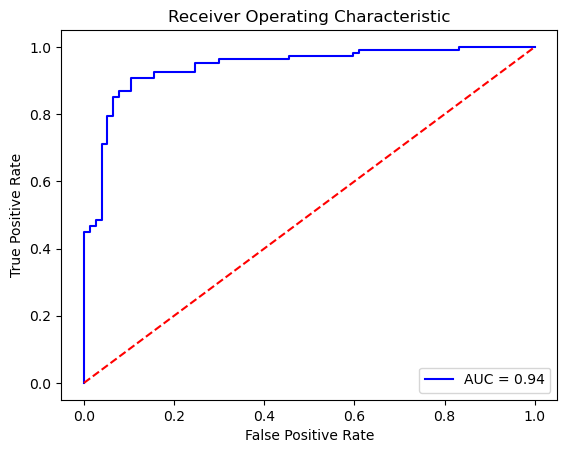

In [73]:
# Plotting the ROC curve 
fpr, tpr , threshold = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
cf_matrix = confusion_matrix(y_test,y_preds)
cf_matrix

array([[69,  8],
       [10, 97]])

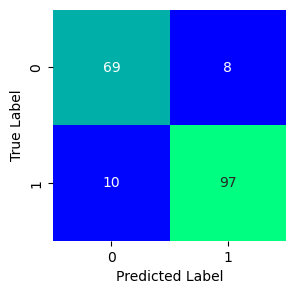

In [75]:
def plot_confusion_mat(cf_matrix):
        """
        Plots a nice looking confusio matrix using Seaborn's heatmap()
        """
        fig, ax= plt.subplots(figsize=(3,3))
        ax = sns.heatmap(cf_matrix,annot=True,cbar=False,cmap="winter")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
plot_confusion_mat(cf_matrix)

Having obtained a ROC curve, an AUC metric, and a confusion matrix, we can further analyze the performance of our classifier model by generating a classification report. Additionally, we can assess the precision, recall, and F1-score through cross-validation.

By leveraging these evaluation measures, we can gain a comprehensive understanding of the model's classification capabilities. The ROC curve provides insights into the trade-off between true positive rate and false positive rate, while the AUC metric quantifies the model's overall performance.

The confusion matrix allows us to examine the model's accuracy in making specific predictions, such as true positives, true negatives, false positives, and false negatives. From this information, we can calculate precision, recall, and F1-score, which provide a more nuanced assessment of the model's performance.

Moreover, by employing cross-validation techniques, we can obtain average precision, recall, and F1-score values, which provide a more robust estimation of the model's performance across different subsets of the data.

In summary, by generating a classification report and calculating cross-validated precision, recall, and F1-score, we can comprehensively evaluate the performance of our classifier model and gain valuable insights into its effectiveness in predicting heart disease.

In [76]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        77
           1       0.92      0.91      0.92       107

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



### Calculate Evaluation Metrics Using Cross-Validation

We're going to calculate precision, recall, f1-score of our model using cross-validation and  to do so we will use `cross_val_score`

In [90]:
# Check the best hyperparamters
gs_rfc.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [91]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(bootstrap=True,
 max_depth= 90,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 1600
                )

In [92]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8310762651461154

In [93]:
# Cross-validated precision
cv_pre = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8483539651211943

In [94]:
# Cross-validated recall
cv_rec = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.865967773247913

In [95]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8508500341877265

<Axes: title={'center': 'Cross-validated classification metric'}>

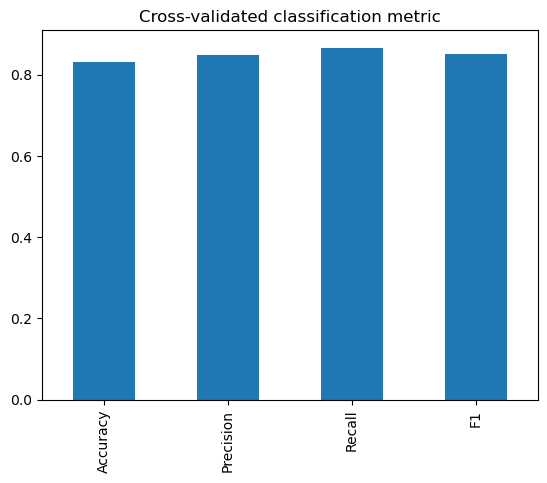

In [97]:
# Lets isualize our cross_validated metrics 
cv_metric = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_pre,
    "Recall": cv_rec,
    "F1": cv_f1},
    index = [0]
    )
cv_metric.T.plot.bar(title = "Cross-validated classification metric",legend=False)

### Feature Importance 
Determining feature importance is a crucial aspect of understanding the contribution of each feature towards the outcomes predicted by the model. However, the approach to finding feature importance varies across different machine learning models.

To identify the feature importance for our Random Forest Classifier model, we can utilize specific techniques tailored to this model. Random Forest models offer built-in mechanisms to measure feature importance based on how much each feature contributes to the overall predictive power of the model.

By employing these techniques, we can assess the relative importance of each feature and gain insights into how they contribute to the outcomes predicted by the Random Forest Classifier. This information helps us understand which features have the most significant impact on the model's performance and can guide us in interpreting and analyzing the results effectively.

Therefore, by exploring the feature importance in our Random Forest Classifier model, we can uncover the key features that drive the predictions and gain a deeper understanding of their respective contributions to the overall model performance.

In [98]:
gs_rfc.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1600}

In [99]:
# Fit an insatnace of RandomForestClassifier
clf = RandomForestClassifier(bootstrap= True,
 max_depth= 90,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 1600)

clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=90, min_samples_split=5, n_estimators=1600)

In [100]:
# Check feature_importance_
clf.feature_importances_

array([0.0795872 , 0.03566042, 0.10847496, 0.05702137, 0.1028553 ,
       0.0200892 , 0.02019073, 0.09946876, 0.10881094, 0.12048852,
       0.24735261])

In [101]:
# Match feeatures with column
feature_dict = dict(zip(data.columns,list(clf.feature_importances_)))
feature_dict

{'Age': 0.07958719618634533,
 'Sex': 0.035660416145741405,
 'ChestPainType': 0.10847495754440395,
 'RestingBP': 0.05702137052799903,
 'Cholesterol': 0.1028553049166906,
 'FastingBS': 0.020089199051445378,
 'RestingECG': 0.020190726916573858,
 'MaxHR': 0.09946876319271586,
 'ExerciseAngina': 0.10881093889655147,
 'Oldpeak': 0.12048851571358904,
 'ST_Slope': 0.24735261090794397}

<Axes: title={'center': 'Feature Importance'}>

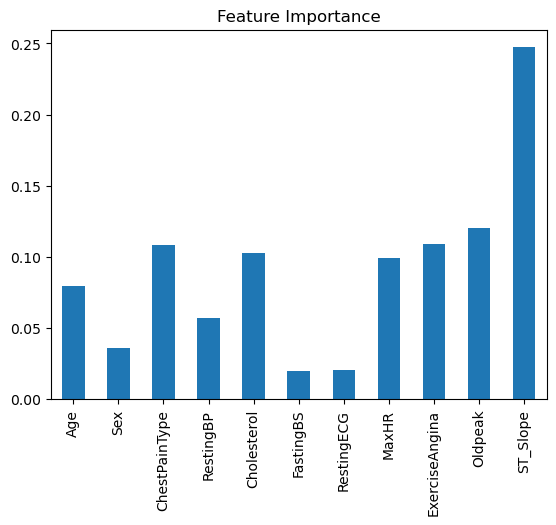

In [102]:
# Visualize frsture importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance",legend = False)

In [103]:
pd.crosstab(data_tree["ST_Slope"],data_tree["HeartDisease"])

HeartDisease,0,1
ST_Slope,,
0,14,49
1,79,381
2,317,78


In [104]:
pd.crosstab(data_tree["ExerciseAngina"],data_tree["HeartDisease"])

HeartDisease,0,1
ExerciseAngina,,
0,355,192
1,55,316


Now let's save our model

In [106]:
import joblib

filename = "my_model.joblib"

# save model
joblib.dump(clf, filename)

['my_model.joblib']

# 6. Experimentation

We haven't hit our evaluation metric yet... so these are the following which can can do..


1. Exploring better models: We can explore alternative machine learning models that may offer improved performance for our specific problem. Models like CatBoost or XGBoost are known for their strong performance and ability to handle complex datasets. By implementing these models, we may be able to achieve better evaluation metrics and enhance the accuracy of our predictions.

2. Refining the current models: We can assess the existing models and identify areas where improvements can be made. This may involve fine-tuning the hyperparameters of the models or adjusting the feature selection techniques. By optimizing the current models, we can potentially enhance their performance and achieve better evaluation metrics.

3. Feature engineering: Analyzing and transforming the existing features or creating new features based on domain knowledge can significantly impact the model's performance. Feature engineering techniques such as scaling, encoding categorical variables, or creating interaction terms can improve the models' ability to capture important patterns and relationships in the data.

4. Ensemble methods: Utilizing ensemble methods, such as combining the predictions of multiple models, can often lead to improved performance. Techniques like stacking, where multiple models are trained and their predictions are combined, can potentially boost the accuracy and reliability of our predictions.

By considering these strategies, we can explore the potential for using better models, refining the current models, or employing techniques like feature engineering and ensemble methods. These approaches can help us achieve better evaluation metrics and enhance the overall performance of our heart disease classifier.